<a href="https://colab.research.google.com/github/MrData-Science/MSE/blob/main/Practica3_MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pycaret --quiet --upgrade
!pip install scikit-optimize

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
url_data = '/content/FAOSTAT_data_es_4-13-2024.csv'

data = pd.read_csv(url_data)

data = data[['Área', 'Meses', 'Año', 'Valor']]

print(f'Dataframe shape: {data.shape}')
data.head()

Dataframe shape: (68484, 4)


,Área,Meses,Año,Valor
0,Afganistán,Enero,2000,1.655
1,Afganistán,Enero,2001,-0.514
2,Afganistán,Enero,2002,1.910
3,Afganistán,Enero,2003,2.546
4,Afganistán,Enero,2004,2.721


In [ ]:
# PARA AGREGAR FUENTES DE DATOS AL CASO DE ESTUDIO
# pd.concat([data, data01, 02, 03, ..., ], axis=0)
# axis=0 es horizontal, axis=1 es vertical

In [ ]:
data.columns

Index(['Área', 'Meses', 'Año', 'Valor'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68484 entries, 0 to 68483
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Área    68484 non-null  object 
 1   Meses   68484 non-null  object 
 2   Año     68484 non-null  int64  
 3   Valor   64570 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [ ]:
# Convertir la columna 'Año' a tipo numérico
data['Año'] = pd.to_numeric(data['Año'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68484 entries, 0 to 68483
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Área    68484 non-null  object 
 1   Meses   68484 non-null  object 
 2   Año     68484 non-null  int64  
 3   Valor   64570 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [ ]:
import numpy as np

In [ ]:
data.replace({np.nan:0}, inplace=True)

In [ ]:
# Filtrar los datos para entrenamiento y validación
train_data = data[(data['Año'] >= 2000) & (data['Año'] <= 2020)]
test_data = data[(data['Año'] >= 2021) & (data['Año'] <= 2023)]


print(f'train_data shape: {train_data.shape}, test_data shape: {test_data.shape}')

train_data shape: (59916, 4), test_data shape: (8568, 4)


In [ ]:
train_data


,Área,Meses,Año,Valor
0,Afganistán,Enero,2000,1.655
1,Afganistán,Enero,2001,-0.514
2,Afganistán,Enero,2002,1.910
3,Afganistán,Enero,2003,2.546
4,Afganistán,Enero,2004,2.721
...,...,...,...,...
68476,Zimbabwe,Diciembre,2016,0.992
68477,Zimbabwe,Diciembre,2017,0.616
68478,Zimbabwe,Diciembre,2018,1.321
68479,Zimbabwe,Diciembre,2019,2.184


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

features = ['Año']
# Dividir los datos en características (X) y variable objetivo (y) para entrenamiento y prueba
X_train = train_data[['Área','Meses','Año']]
y_train = train_data['Valor']

X_test = test_data[['Área','Meses','Año']]
y_test = test_data['Valor']
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)
# Definir transformadores para características numéricas y categóricas
numeric_features = ['Año']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Área','Meses']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    # ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Crear el modelo de regresión no lineal (Random Forest Regressor)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('imputer', SimpleImputer(strategy='median')),  # Imputer para la variable objetivo
                        ('regressor',RandomForestRegressor())])

# Definir el espacio de búsqueda de hiperparámetros


In [ ]:
model.steps

[('preprocessor',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('scaler', StandardScaler())]),
                                   ['Año']),
                                  ('cat',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(fill_value='missing',
                                                                  strategy='constant')),
                                                   ('onehot',
                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                   ['Área', 'Meses'])])),
 ('imputer', SimpleImputer(strategy='median')),
 ('regressor', RandomForestRegressor())]

## Ajuste de hiperparametros

In [ ]:
'''
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=None))  # Puedes ajustar los hiperparámetros aquí
]) '''

## Uso de otros modelos

In [ ]:
'''
from sklearn.tree import DecisionTreeRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('imputer', SimpleImputer(strategy='median')),  # Imputer para la variable objetivo
                        ('regressor',DecisionTreeRegressor())])
                        '''

In [ ]:
'''
from sklearn.ensemble import GradientBoostingRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('imputer', SimpleImputer(strategy='median')),  # Imputer para la variable objetivo
                        ('regressor',GradientBoostingRegressor())])
'''

In [ ]:

from sklearn.neighbors import KNeighborsRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('imputer', SimpleImputer(strategy='median')),  # Imputer para la variable objetivo
                        ('regressor',KNeighborsRegressor())])


In [ ]:
# Entrenar el modelo
#model.fit(X_train.sample(n=10, random_state=42), y_train.sample(n=10, random_state=42))
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Año']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Área', 'Meses'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('regressor', KNeighborsRegressor())])

In [ ]:
## RETO: obtener lista de "feature importance"

# # Obtener el preprocesador y el regresor del modelo
# preprocessor = model.named_steps['preprocessor']
# regressor = model.named_steps['regressor']

# import pandas as pd

# # Obtener las características después del preprocesamiento
# features_after_preprocessing = preprocessor.transformers_[0][1].named_steps['scaler'].get_feature_names_out(input_features=['Año']) + \
#                                 preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(input_features=['Área', 'Meses'])

# # Obtener la importancia de características del RandomForestRegressor
# importances = regressor.feature_importances_

# # Crear un DataFrame para visualizar las importancias de características
# importance_df = pd.DataFrame({'Feature': features_after_preprocessing, 'Importance': importances})

# # Ordenar las características por importancia en orden descendente
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Mostrar el DataFrame de importancia de características
# print(importance_df)


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

(8568,)

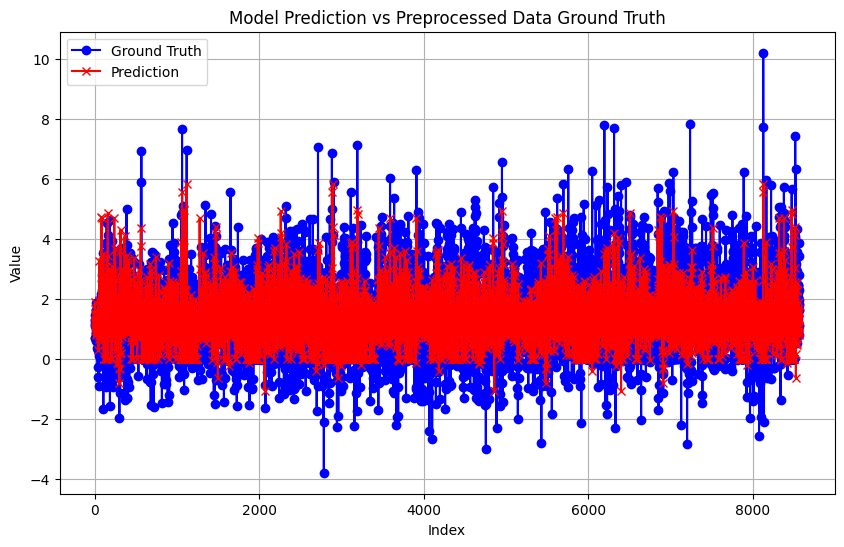

In [ ]:
import matplotlib.pyplot as plt

# Ordenar los índices para asegurar que las predicciones y los valores reales estén alineados
sorted_indices = X_test['Año'].argsort()

# Obtener las predicciones ordenadas
y_pred_sorted = y_pred[sorted_indices]
y_test_sorted = y_test.values[sorted_indices]

# Plotear los valores reales y las predicciones
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Ground Truth', color='blue', marker='o')
plt.plot(y_pred_sorted, label='Prediction', color='red', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Model Prediction vs Preprocessed Data Ground Truth')
plt.legend()
plt.grid(True)
plt.show()


## Evaluación del modelo

In [ ]:
from sklearn.metrics import mean_squared_error

# Predecir sobre el conjunto de prueba X_test
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y_test vs y_pred
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio en los datos de prueba: {mse}')


Error cuadrático medio en los datos de prueba: 1.0979890895331468


In [ ]:
print(f'Reto: bajar el MSE {mse} el 10%, o sea, mínimo {mse - (mse*0.1)}')

Reto: bajar el MSE 1.3061429986813258 el 10%, o sea, mínimo 1.1755286988131932
